<a href="https://colab.research.google.com/github/Renarion/Choose-airports-for-enter-the-market/blob/main/CL_DA_Project_2_Team_4_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We import the libraries that we will use. We also write data from Google drive into variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import nltk
import folium
from folium.features import DivIcon

from scipy import stats # import library for statistics

from google.colab import drive # import library for access to Google Drive 
drive.mount('/content/drive')

fastfood = pd.read_csv('/content/drive/MyDrive/Team 4 for colab files/FastFoodRestaurants.csv') # Читаем 1 файл из Kaggle
datafiniti_may19 = pd.read_csv('/content/drive/MyDrive/Team 4 for colab files/Datafiniti_Fast_Food_Restaurants_May19.csv') # Читаем 2 файл из Kaggle
datafiniti = pd.read_csv('/content/drive/MyDrive/Team 4 for colab files/Datafiniti_Fast_Food_Restaurants.csv') # Читаем 3 файл из Kaggle

df_usa_0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/USA_adm0.csv')
df_usa_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/USA_adm1.csv')
df_usa_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/USA_adm2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### We combine all dataframes and choose only those cities that consider for opening restaurants

In [2]:
df = pd.concat([fastfood, datafiniti, datafiniti_may19])

In [3]:
df.query('city in "Cincinnati" & province in "OH" or city in "Las Vegas" & province in "NV" or city in "Miami" & province in "FL" or city in "Cleveland" & province in "OH" or city in "Columbus" & province in "OH" or city in "Indianapolis" & province in "IN" or city in "Birmingham" & province in "AL" or city in "Portland" & province in "OR"', inplace=True)

# Build mapbox graph to see the alignment of the planned regions

In [4]:
fig = px.scatter_mapbox(df, # Dataframe
                        lat="latitude", # latitude
                        lon="longitude", # longitude
                        hover_name="name", # Main title of restaurants
                        hover_data=['city', 'province'], # Secondary sign
                        color_discrete_sequence=["black"], # Color of dots
                        zoom=5, 
                        #size="cnt",
                        height=1500
                        ) # Height of map
fig.update_layout(mapbox_style="open-street-map") # style of map
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

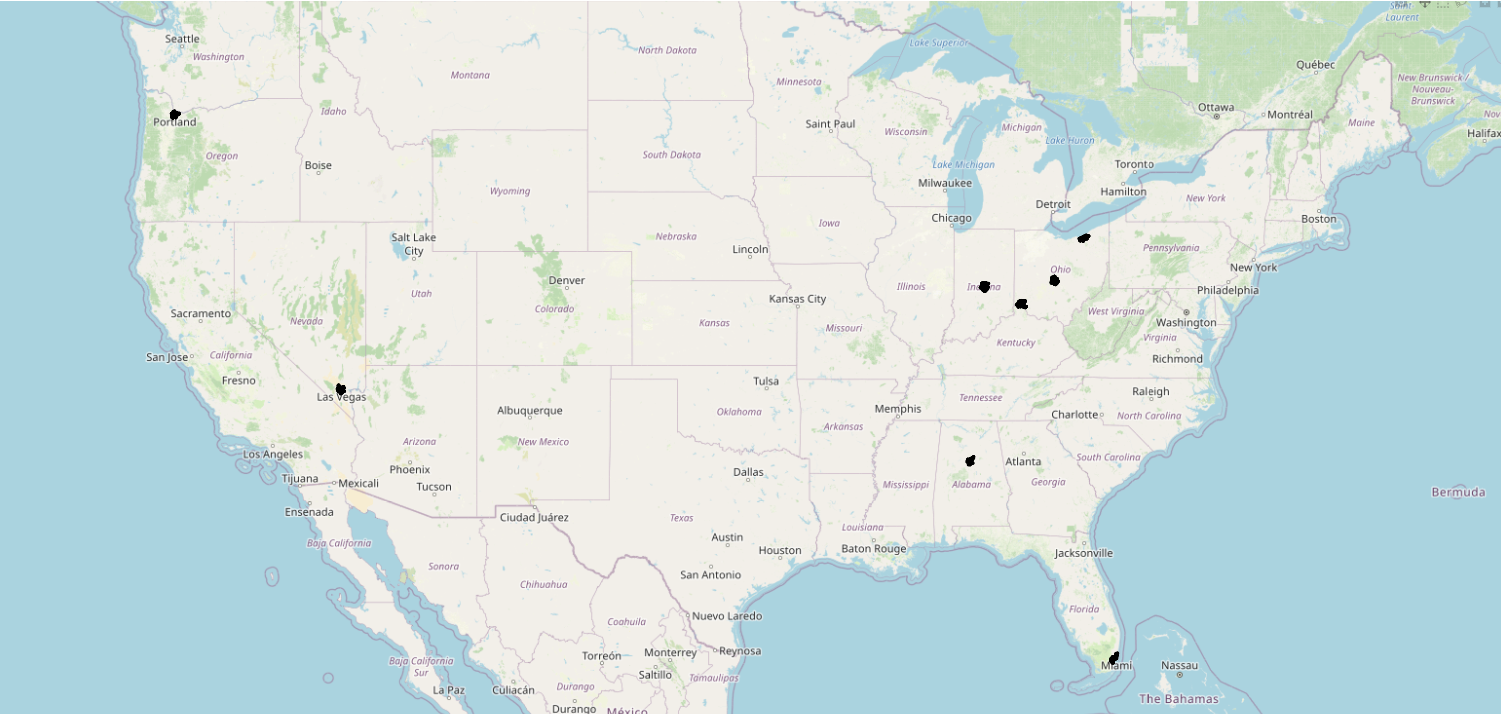

# Write into individual city filter dataframes and view the top 5 of the most common

In [5]:
# Getting unique restaurant names
restaurant_names = df['name'].unique()

# Calculation and conclusion of the most similar names of restaurants
most_similar = []
for i in range(len(restaurant_names)):
    # Create a temporary list to store similar words
    temp_similar = [restaurant_names[i]]
    
    # Compare and store similar words
    for j in range(len(restaurant_names)):
        if restaurant_names[i] == restaurant_names[j]:
            continue
        if nltk.edit_distance(restaurant_names[i].lower(), restaurant_names[j].lower()) < 3:
            temp_similar.append(restaurant_names[j])
            
    # Similar words found
    if len(temp_similar) > 1:
        most_similar.append(temp_similar)
    if i > 0 and i % 10 == 0:
        print("index", i-10, "-", i, "checking finished| most similar size:", len(most_similar))
print("similarity checking finished")

# Counting the number of similar words
most_similar_word_count = 0
for i in most_similar:
    most_similar_word_count += len(i)
print("size of the most similar list:", most_similar_word_count)
most_similar

index 0 - 10 checking finished| most similar size: 6
index 10 - 20 checking finished| most similar size: 10
index 20 - 30 checking finished| most similar size: 14
index 30 - 40 checking finished| most similar size: 19
index 40 - 50 checking finished| most similar size: 21
index 50 - 60 checking finished| most similar size: 23
index 60 - 70 checking finished| most similar size: 26
index 70 - 80 checking finished| most similar size: 29
index 80 - 90 checking finished| most similar size: 30
index 90 - 100 checking finished| most similar size: 32
index 100 - 110 checking finished| most similar size: 36
index 110 - 120 checking finished| most similar size: 36
index 120 - 130 checking finished| most similar size: 37
index 130 - 140 checking finished| most similar size: 37
index 140 - 150 checking finished| most similar size: 39
index 150 - 160 checking finished| most similar size: 41
index 160 - 170 checking finished| most similar size: 44
index 170 - 180 checking finished| most similar size

[['Mr Hero', 'Mr. Hero'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ["Wendy's", 'Wendys'],
 ["Arby's", 'Arbys'],
 ["Jimmy John's", 'Jimmy Johns'],
 ["McDonald's", 'McDonalds', 'Mcdonalds', "Mcdonald's"],
 ["Steak 'n Shake", "Steak 'N Shake"],
 ['SONIC Drive In', 'Sonic Drive-In'],
 ['Dominos Pizza', "Domino's Pizza"],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ['KFC', 'Kfc'],
 ['McDonalds', "McDonald's", 'Mcdonalds', "Mcdonald's"],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ['Subway', 'SUBWAY', 'SUBWAY¬Æ'],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ['Mcdonalds', "McDonald's", 'McDonalds', "Mcdonald's"],
 ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"],
 ["Rally's", 'Rallys'],
 ["Steak 'N Shake", "Steak 'n Shake"],
 ['Port Of Subs', 'Port of Subs'],
 ["Mcdonald's", "McDonald's", 'McDonalds', 'Mcdonalds'],
 ['SUBWAY', 'Subway', 'SUBWAY¬Æ'],
 ["Church's Chicken", 'Churchs Chicken'],
 ["Carl's Jr.", 'Carls Jr'],
 ["Checker

In [6]:
most_similar_edited = [['Mr Hero', 'Mr. Hero'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ["Wendy's", 'Wendys'],
 ["Arby's", 'Arbys'],
 ["McDonald's", 'Mcdonalds', "Mcdonald's", 'McDonalds'],
 ["Steak 'n Shake", "Steak 'N Shake"],
 ['SONIC Drive In', 'Sonic Drive-In'],
 ['Dominos Pizza', "Domino's Pizza"],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ['Subway', 'SUBWAY', 'SUBWAY¬Æ'],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ['Mcdonalds', "McDonald's", "Mcdonald's", 'McDonalds'],
 ["Steak 'N Shake", "Steak 'n Shake"],
 ['Port Of Subs', 'Port of Subs'],
 ["Mcdonald's", "McDonald's", 'Mcdonalds', 'McDonalds'],
 ['SUBWAY', 'Subway', 'SUBWAY¬Æ'],
 ['McDonalds', "McDonald's", 'Mcdonalds', "Mcdonald's"],
 ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"],
 ["Carl's Jr.", 'Carls Jr'],
 ["Checker's", 'Checkers'],
 ['Port of Subs', 'Port Of Subs'],
 ['W.G. Grinders', 'WG Grinders'],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['Mrs. Fields', 'Mrs Fields'],
 ['Mr. Hero', 'Mr Hero'],
 ['SUBWAY¬Æ', 'Subway', 'SUBWAY'],
 ['Sonic Drive-In', 'SONIC Drive In'],
 ['WG Grinders', 'W.G. Grinders'],
 ['Mrs Fields', 'Mrs. Fields'],
 ['ChickfilA', 'Chick-fil-A', 'Chick-Fil-A'],
 ['Arbys', "Arby's"],
 ['Checkers', "Checker's"],
 ['Carls Jr', "Carl's Jr."],
 ['Churchs Chicken', "Church's Chicken"],
 ['Wendys', "Wendy's"],
 ["Church's Chicken", 'Churchs Chicken']]

 # Sort by the first element of each list
def sortFirst(val): 
    return val[0]  

# Sort the array in ascending order with the first element
most_similar_edited.sort(key = sortFirst)  
most_similar_edited

[["Arby's", 'Arbys'],
 ['Arbys', "Arby's"],
 ["Carl's Jr.", 'Carls Jr'],
 ['Carls Jr', "Carl's Jr."],
 ["Checker's", 'Checkers'],
 ['Checkers', "Checker's"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ['ChickfilA', 'Chick-fil-A', 'Chick-Fil-A'],
 ["Church's Chicken", 'Churchs Chicken'],
 ['Churchs Chicken', "Church's Chicken"],
 ["Domino's Pizza", 'Dominos Pizza'],
 ['Dominos Pizza', "Domino's Pizza"],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ["McDonald's", 'Mcdonalds', "Mcdonald's", 'McDonalds'],
 ['McDonalds', "McDonald's", 'Mcdonalds', "Mcdonald's"],
 ["Mcdonald's", "McDonald's", 'Mcdonalds', 'McDonalds'],
 ['Mcdonalds', "McDonald's", "Mcdonald's", 'McDonalds'],
 ['Mr Hero', 'Mr. Hero'],
 ['Mr. Hero', 'Mr Hero'],
 ['Mrs Fields', 'Mrs. Fields'],
 ['Mrs. Fields', 'Mrs Fields'],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"],


In [7]:
# Re-process data to further clean
most_similar_sorted = [["Arby's", 'Arbys'],
 ['Arbys', "Arby's"],
 ["Carl's Jr.", 'Carls Jr'],
 ['Carls Jr', "Carl's Jr."],
 ["Checker's", 'Checkers'],
 ['Checkers', "Checker's"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ['ChickfilA', 'Chick-fil-A', 'Chick-Fil-A'],
 ["Church's Chicken", 'Churchs Chicken'],
 ['Churchs Chicken', "Church's Chicken"],
 ["Domino's Pizza", 'Dominos Pizza'],
 ['Dominos Pizza', "Domino's Pizza"],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ["McDonald's", 'Mcdonalds', "Mcdonald's", 'McDonalds'],
 ['McDonalds', "McDonald's", 'Mcdonalds', "Mcdonald's"],
 ["Mcdonald's", "McDonald's", 'Mcdonalds', 'McDonalds'],
 ['Mcdonalds', "McDonald's", "Mcdonald's", 'McDonalds'],
 ['Mr Hero', 'Mr. Hero'],
 ['Mr. Hero', 'Mr Hero'],
 ['Mrs Fields', 'Mrs. Fields'],
 ['Mrs. Fields', 'Mrs Fields'],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"],
 ['Port Of Subs', 'Port of Subs'],
 ['Port of Subs', 'Port Of Subs'],
 ['SONIC Drive In', 'Sonic Drive-In'],
 ['SUBWAY', 'Subway', 'SUBWAY¬Æ'],
 ['SUBWAY¬Æ', 'Subway', 'SUBWAY'],
 ['Sonic Drive-In', 'SONIC Drive In'],
 ["Steak 'N Shake", "Steak 'n Shake"],
 ["Steak 'n Shake", "Steak 'N Shake"],
 ['Subway', 'SUBWAY', 'SUBWAY¬Æ'],
 ['W.G. Grinders', 'WG Grinders'],
 ['WG Grinders', 'W.G. Grinders'],
 ["Wendy's", 'Wendys'],
 ['Wendys', "Wendy's"]]

print("cleaned, matched restaurant name count:", len(most_similar_sorted))

cleaned, matched restaurant name count: 38


In [8]:
# Create dictionary for change the name
match_name_dict = {}
for row in most_similar_sorted:
    for similar_word in row:
        match_name_dict[similar_word] = row[0]
match_name_dict

{"Arby's": 'Arbys',
 'Arbys': 'Arbys',
 "Carl's Jr.": 'Carls Jr',
 'Carls Jr': 'Carls Jr',
 "Checker's": 'Checkers',
 'Checkers': 'Checkers',
 'Chick-Fil-A': 'ChickfilA',
 'Chick-fil-A': 'ChickfilA',
 'ChickfilA': 'ChickfilA',
 "Church's Chicken": 'Churchs Chicken',
 'Churchs Chicken': 'Churchs Chicken',
 "Domino's Pizza": 'Dominos Pizza',
 'Dominos Pizza': 'Dominos Pizza',
 'Dunkin Donuts': "Dunkin' Donuts",
 "Dunkin' Donuts": "Dunkin' Donuts",
 "McDonald's": 'Mcdonalds',
 'Mcdonalds': 'Mcdonalds',
 "Mcdonald's": 'Mcdonalds',
 'McDonalds': 'Mcdonalds',
 'Mr Hero': 'Mr. Hero',
 'Mr. Hero': 'Mr. Hero',
 'Mrs Fields': 'Mrs. Fields',
 'Mrs. Fields': 'Mrs. Fields',
 "Popeye's Louisiana Kitchen": 'Popeyes Louisiana Kitchen',
 'Popeyes Louisiana Kitchen': 'Popeyes Louisiana Kitchen',
 'Port Of Subs': 'Port of Subs',
 'Port of Subs': 'Port of Subs',
 'SONIC Drive In': 'Sonic Drive-In',
 'Sonic Drive-In': 'Sonic Drive-In',
 'SUBWAY': 'Subway',
 'Subway': 'Subway',
 'SUBWAY¬Æ': 'Subway',
 "Stea

In [9]:
names = df['name'].values
print("size:", len(names))

# Replace their names with a dictionary value
for i in range(len(names)):
    if match_name_dict.get(names[i]) != None:
        names[i] = match_name_dict[names[i]]

df['names'] = names

size: 1193


### Visualize the top 5 restaurants that are most common in the city

----------
Miami top 5
----------
Burger King    29
Mcdonalds      24
KFC            12
Subway         11
Pizza Hut      11
Name: name, dtype: int64


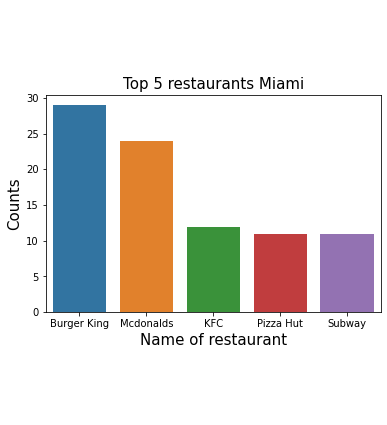

<Figure size 720x720 with 0 Axes>

----------
Cincinnati top 5
----------
Mcdonalds       22
Wendys          18
Burger King     17
White Castle    16
Taco Bell       15
Name: name, dtype: int64


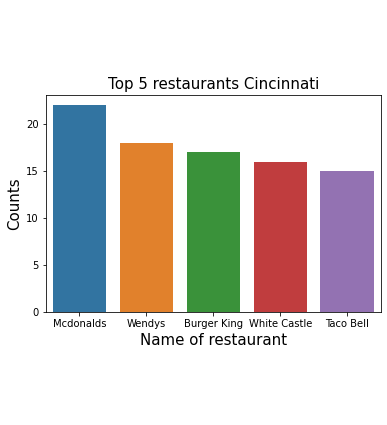

<Figure size 720x720 with 0 Axes>

----------
Las Vegas top 5
----------
Mcdonalds          32
Jack in the Box    19
Taco Bell          17
Subway             15
Carls Jr           10
Name: name, dtype: int64


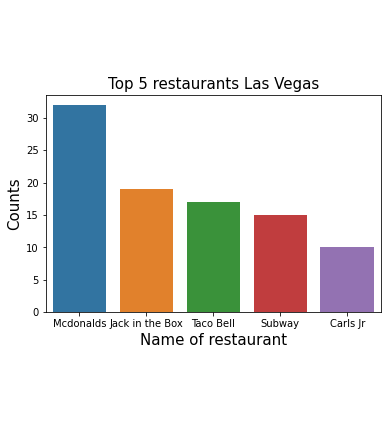

<Figure size 720x720 with 0 Axes>

----------
Cleveland top 5
----------
Subway         13
Burger King    10
Wendys          9
Mcdonalds       7
Mr. Hero        6
Name: name, dtype: int64


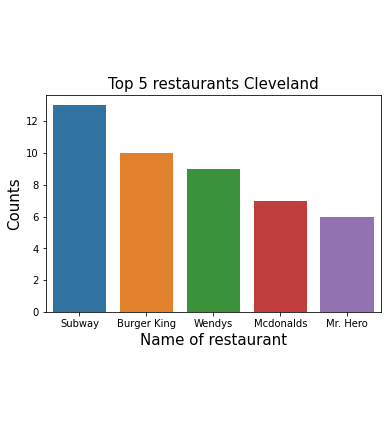

<Figure size 720x720 with 0 Axes>

----------
Columbus top 5
----------
Subway       25
Mcdonalds    18
Taco Bell    13
Wendys        8
Arbys         7
Name: name, dtype: int64


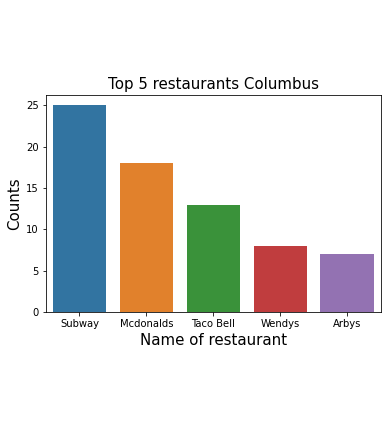

<Figure size 720x720 with 0 Axes>

----------
Indianapolis top 5
----------
Taco Bell    13
Subway       12
Arbys        11
Pizza Hut     8
Mcdonalds     7
Name: name, dtype: int64


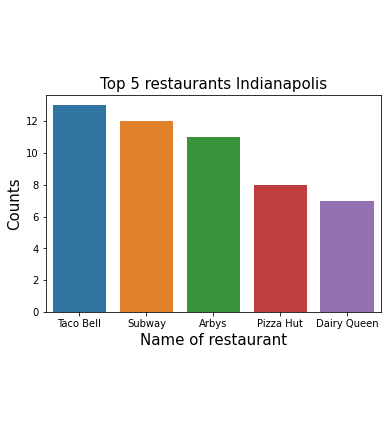

<Figure size 720x720 with 0 Axes>

----------
Birmingham top 5
----------
Subway             7
ChickfilA          7
Mcdonalds          6
Churchs Chicken    5
Pizza Hut          4
Name: name, dtype: int64


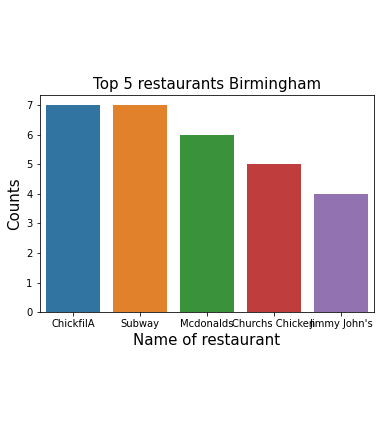

<Figure size 720x720 with 0 Axes>

----------
Portland top 5
----------
Mcdonalds          17
Subway             11
Taco Bell           9
Burger King         7
Jack in the Box     6
Name: name, dtype: int64


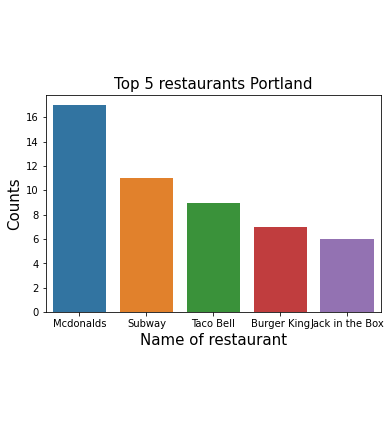

<Figure size 720x720 with 0 Axes>

In [10]:
cities = {'Miami': 'FL',
          'Cincinnati' : 'OH',
          'Las Vegas' : 'NV',
          'Cleveland' : 'OH',
          'Columbus' : 'OH',
          'Indianapolis' : 'IN',
          'Birmingham' : 'AL',
          'Portland' : 'OR' }.items()

cities = [list(i) for i in cities]

for i in list(cities):
  x = df.query(f"city in ('{i[0]}') & province in ('{i[1]}')")
  print('----------')
  print(f'{i[0]} top 5')
  print('----------')
  print(x.name.value_counts().head(5))

  y = x.groupby('name')[['address','postalCode']] \
          .agg('count') \
          .reset_index() \
          .nlargest(5, 'address')\
          .reset_index()

  sns.barplot(data = y, x = 'name', y = 'address')

  plt.xlabel('Name of restaurant\n\n\n\n', fontsize=15)
  plt.ylabel('Counts', fontsize=15)
  plt.title(f'\n\n\n\nTop 5 restaurants {i[0]}', fontsize=15)
  plt.figure(figsize=(10,10))
  plt.show()

# Consider the share of each restaurant in the city and also a share compared to other cities

In [11]:
# Consider the total share of restaurants in all cities
df_total_share = df.groupby('name')['address'].agg('count') \
            .sort_values(ascending=False) \
            .reset_index() \
            .rename(columns={'name':'Name of restaurant', 'address':'Quantity'})

df_total_share['Total restaurants'] = df_total_share.Quantity.sum()
df_total_share['Share of restaurant'] = df_total_share.Quantity / df_total_share['Total restaurants']*100

# Consider the share of restaurants in cities
df_cities_share = df.pivot_table(['address'], ['city', 'name'], aggfunc='count') \
            .sort_values(by=['city', 'address'], ascending=False) \
            .reset_index() \
            .rename(columns={'name':'Name of restaurant', 'address':'quantity'})

total_by_cities = df_cities_share.groupby('city')['quantity'].agg('sum').reset_index()

cities_list = list(total_by_cities['city'])
counts_list = list(total_by_cities['quantity'])
for city, qty  in zip(cities_list, counts_list):
    print(f'Upload: {city} and {qty}')
    df_cities_share[f'Total restaurant by {city}'] = df_cities_share.apply(lambda row: qty if row["city"] == f'{city}' else 0, axis=1)
df_cities_share

df_cities_share['Total restaurants by cities'] = df_cities_share['Total restaurant by Miami'] + df_cities_share['Total restaurant by Cincinnati'] + df_cities_share['Total restaurant by Las Vegas'] + df_cities_share['Total restaurant by Cleveland'] + df_cities_share['Total restaurant by Indianapolis'] + df_cities_share['Total restaurant by Birmingham'] + df_cities_share['Total restaurant by Portland']

df_cities_share.drop(['Total restaurant by Miami', 'Total restaurant by Cincinnati', 'Total restaurant by Las Vegas', 'Total restaurant by Cleveland', 'Total restaurant by Columbus', 'Total restaurant by Indianapolis', 'Total restaurant by Birmingham', 'Total restaurant by Portland'], axis=1, inplace=True)

df_cities_share['Share of restaurants by city'] = df_cities_share['quantity'] / df_cities_share['Total restaurants by cities']*100

df_cities_share


Upload: Birmingham and 81
Upload: Cincinnati and 205
Upload: Cleveland and 109
Upload: Columbus and 166
Upload: Indianapolis and 161
Upload: Las Vegas and 200
Upload: Miami and 163
Upload: Portland and 108


city            Name of restaurant  quantity  \
0      Portland                     Mcdonalds        17   
1      Portland                        Subway        11   
2      Portland                     Taco Bell         9   
3      Portland                   Burger King         7   
4      Portland               Jack in the Box         6   
..          ...                           ...       ...   
356  Birmingham           Saigon Noodle House         1   
357  Birmingham                        Sbarro         1   
358  Birmingham  Sol's Sandwich Shop and Deli         1   
359  Birmingham                Sonic Drive-In         1   
360  Birmingham                    Which Wich         1   

     Total restaurants by cities  Share of restaurants by city  
0                            108                     15.740741  
1                            108                     10.185185  
2                            108                      8.333333  
3                            108                      6.481481  
4                            108                      5.555556  
..                           ...                           ...  
356                           81                      1.234568  
357                           81                      1.234568  
358                           81                      1.234568  
359                           81                      1.234568  
360                           81                      1.234568  

[361 rows x 5 columns]

### Visualize the share of restaurants in all cities and by cities. Watch the top 10

In [12]:
df_total_share_10 = df_total_share[['Name of restaurant', 'Share of restaurant']] \
                    .nlargest(10,'Share of restaurant') \
                    .reset_index(drop=True)

fig_1 = px.bar(df_total_share_10, x='Name of restaurant', y='Share of restaurant', title="Total share")
fig_1.show()

df_cities_share_over_5_per = df_cities_share[df_cities_share['Share of restaurants by city']>2][['city', 'Name of restaurant', 'Share of restaurants by city']] \
                              .sort_values('Share of restaurants by city', ascending=False) \
                              .reset_index(drop=True)

fig_2 = px.bar(df_cities_share_over_5_per, x="Name of restaurant", y="Share of restaurants by city", color="city", title="Share by cities")
fig_2.show()
df_total_share_10

Name of restaurant  Share of restaurant
0          Mcdonalds            11.148365
1             Subway             8.549874
2          Taco Bell             6.873428
3        Burger King             6.454317
4             Wendys             4.442582
5              Arbys             3.939648
6          Pizza Hut             3.855826
7                KFC             3.436714
8      Dominos Pizza             2.514669
9    Jack in the Box             2.514669

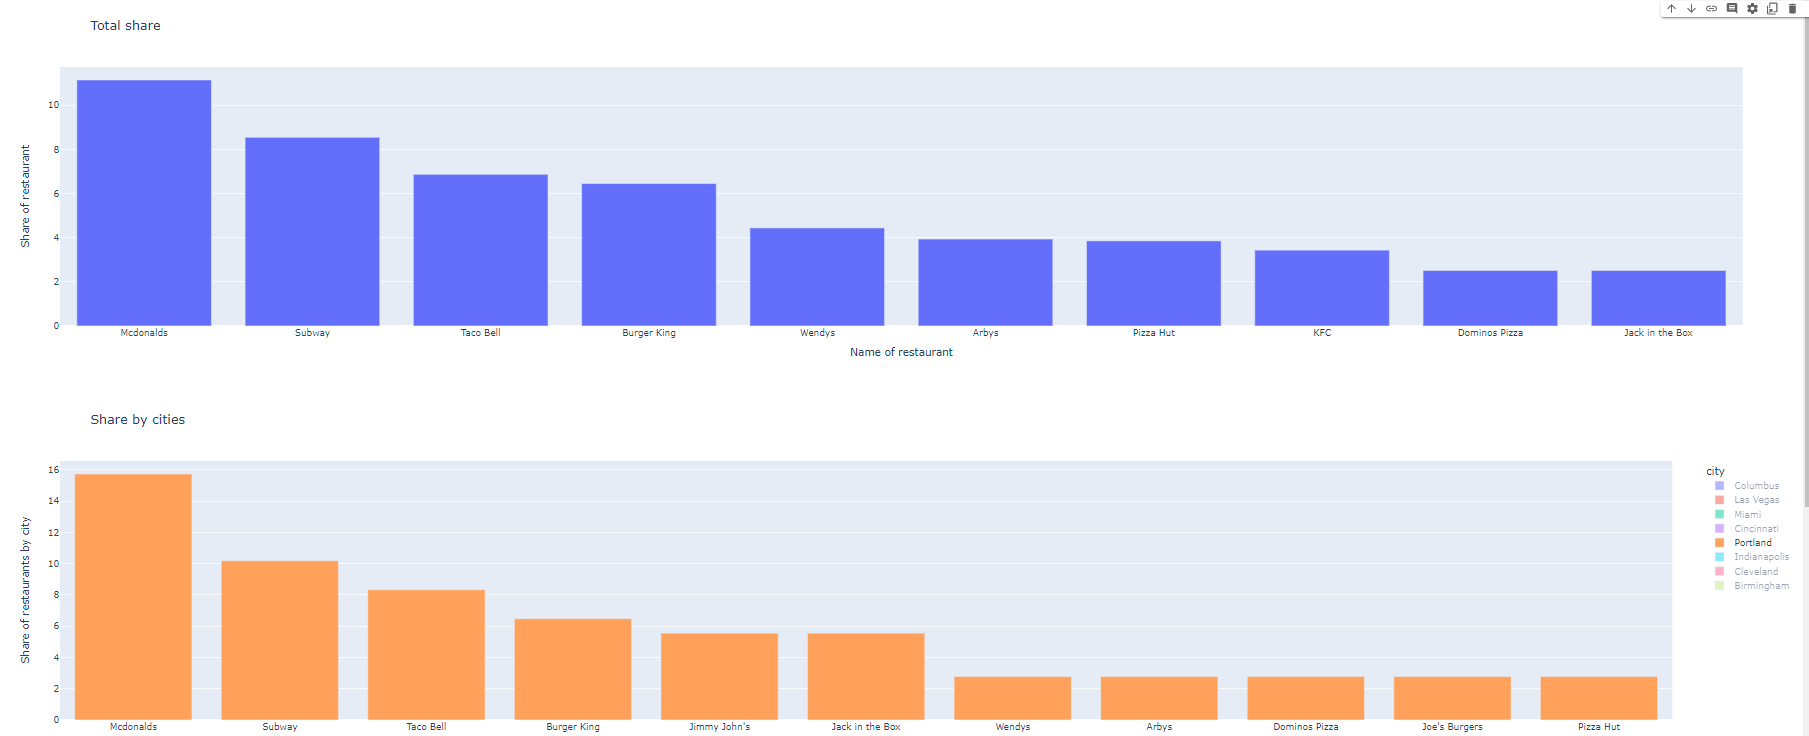

In [13]:
df_cities_share_over_5_per.sort_values(['city', 'Share of restaurants by city'], ascending=False) \
                          .reset_index(drop=True)

city      Name of restaurant  Share of restaurants by city
0      Portland               Mcdonalds                     15.740741
1      Portland                  Subway                     10.185185
2      Portland               Taco Bell                      8.333333
3      Portland             Burger King                      6.481481
4      Portland         Jack in the Box                      5.555556
..          ...                     ...                           ...
146  Birmingham  Chipotle Mexican Grill                      2.469136
147  Birmingham                Hardee's                      2.469136
148  Birmingham      Jersey Mike's Subs                      2.469136
149  Birmingham                     KFC                      2.469136
150  Birmingham            Waffle House                      2.469136

[151 rows x 3 columns]

# Let's check AOV in USA by fast food and AOV in Portland by top restaurants

In [14]:
import pandas as pd
data = {'Chain Name': ['Five Guys', 'Wendys', 'Jack in the Box', 'Burger King', 'McDonalds', 'Subway', 'Taco Bell'], 'Average Price of a Meal in 2019': [17.96, 9.22, 9.18, 7.36, 5.57, 9.86, 9.86], 'Average Price in 2018': [15.83, 7.75, 7.94, 6.08, 5.01, 8.52, 8.52]}
df_aov = pd.DataFrame(data) 

data2 = {'City': ['Los Angeles, CA', 'Portland, OR', 'Miami, FL', 'Columbus, OH'], 'Average Meal Price': [13.13, 10.53, 9.7, 9.68]}
df_aov_2 = pd.DataFrame(data2) 

print('Average Price in 2019 (Competitors) - ', round(df_aov['Average Price of a Meal in 2019'].mean(),2))
print('Average Price in 2018 (Competitors) - ',round(df_aov['Average Price in 2018'].mean(),2))
print('Average Meal Price in Portland - ',round(df_aov_2[df_aov_2['City']=='Portland, OR']['Average Meal Price'].mean(), 2))

Average Price in 2019 (Competitors) -  9.86
Average Price in 2018 (Competitors) -  8.52
Average Meal Price in Portland -  10.53


# We create a dataframe with population density and unit economy data.At the end of the graph with a density by cities

In [15]:
# DF about population in cities
df2 = pd.DataFrame({
    'city': ["Cincinnati", "Las Vegas", "Miami", "Cleveland", "Columbus", "Indianapolis", "Birmingham", "Portland"],
    'longitude':[-84.5120, -115.1391, -80.1918, -81.6944, -82.9988, -86.1581, -86.8104, -122.6784],
    'latitude':[39.1031, 36.1716, 25.7617, 41.4993, 39.9612, 39.7684, 33.5186, 45.5152],
    'province': ["OH", "NV", "FL", "OH", "OH", "IN", "AL", "OR"],
    'population': [309317, 641903, 442241, 372624, 905748, 887642, 200733, 652503],
    'Number_of_restaurants': df['city'].value_counts(), # Number of restaurants
    'ROI':[175.3, 4.2, 18.4, 181.9, 117, 77.7, 74.7, 238.6]
})

df2['Population/value_counts_by_city'] = df2['population'] / df2['Number_of_restaurants']

df2['Population/value_counts_by_city_ver_2'] = pd.to_numeric(df2['Number_of_restaurants'] / df2['population']*10000)

df2['Population/value_counts_by_city_ver_2'] = df2['Population/value_counts_by_city_ver_2'].round()

df2['Population/value_counts_by_city_ver_2'] = df2['Population/value_counts_by_city_ver_2'].astype('int')

df2['Ratio'] = df2['Population/value_counts_by_city_ver_2'] / df2['ROI']

df2['Rank'] = df2['Ratio'].rank(method='dense', ascending=True)

df2['Population/value_counts_by_city'] = df2['Population/value_counts_by_city'].round() \
                                                                                .astype('int')
df2['Ratio'] = df2['Ratio'].round(3)

df2['Rank'] = df2['Rank'].astype('int')

df2[['city', 'longitude', 'latitude', 'province', 'population',
       'Number_of_restaurants', 'Population/value_counts_by_city', 'Population/value_counts_by_city_ver_2', 'ROI', 'Ratio', 'Rank']].sort_values(by='Rank', ascending=True) \
                                                                          .reset_index(drop=True)
list_population = list(df2['population'])
list_population_2 = []
for i in list_population:
  x = i / 13500
  list_population_2.append(x)

fig1 = px.density_mapbox(df2, lat='latitude', lon='longitude', z='Population/value_counts_by_city',
                        mapbox_style="open-street-map",
                        hover_name="city",
                        height = 1500,
                        radius = list_population_2
                        )
 
fig1.show()
df2.sort_values('Rank')

city  longitude  latitude province  population  \
Birmingham        Portland  -122.6784   45.5152       OR      652503   
Cleveland     Indianapolis   -86.1581   39.7684       IN      887642   
Indianapolis      Columbus   -82.9988   39.9612       OH      905748   
Miami            Cleveland   -81.6944   41.4993       OH      372624   
Cincinnati      Cincinnati   -84.5120   39.1031       OH      309317   
Portland        Birmingham   -86.8104   33.5186       AL      200733   
Columbus             Miami   -80.1918   25.7617       FL      442241   
Las Vegas        Las Vegas  -115.1391   36.1716       NV      641903   

              Number_of_restaurants    ROI  Population/value_counts_by_city  \
Birmingham                       81  238.6                             8056   
Cleveland                       109   77.7                             8144   
Indianapolis                    161  117.0                             5626   
Miami                           163  181.9                             2286   
Cincinnati                      205  175.3                             1509   
Portland                        108   74.7                             1859   
Columbus                        166   18.4                             2664   
Las Vegas                       200    4.2                             3210   

              Population/value_counts_by_city_ver_2  Ratio  Rank  
Birmingham                                        1  0.004     1  
Cleveland                                         1  0.013     2  
Indianapolis                                      2  0.017     3  
Miami                                             4  0.022     4  
Cincinnati                                        7  0.040     5  
Portland                                          5  0.067     6  
Columbus                                          4  0.217     7  
Las Vegas                                         3  0.714     8

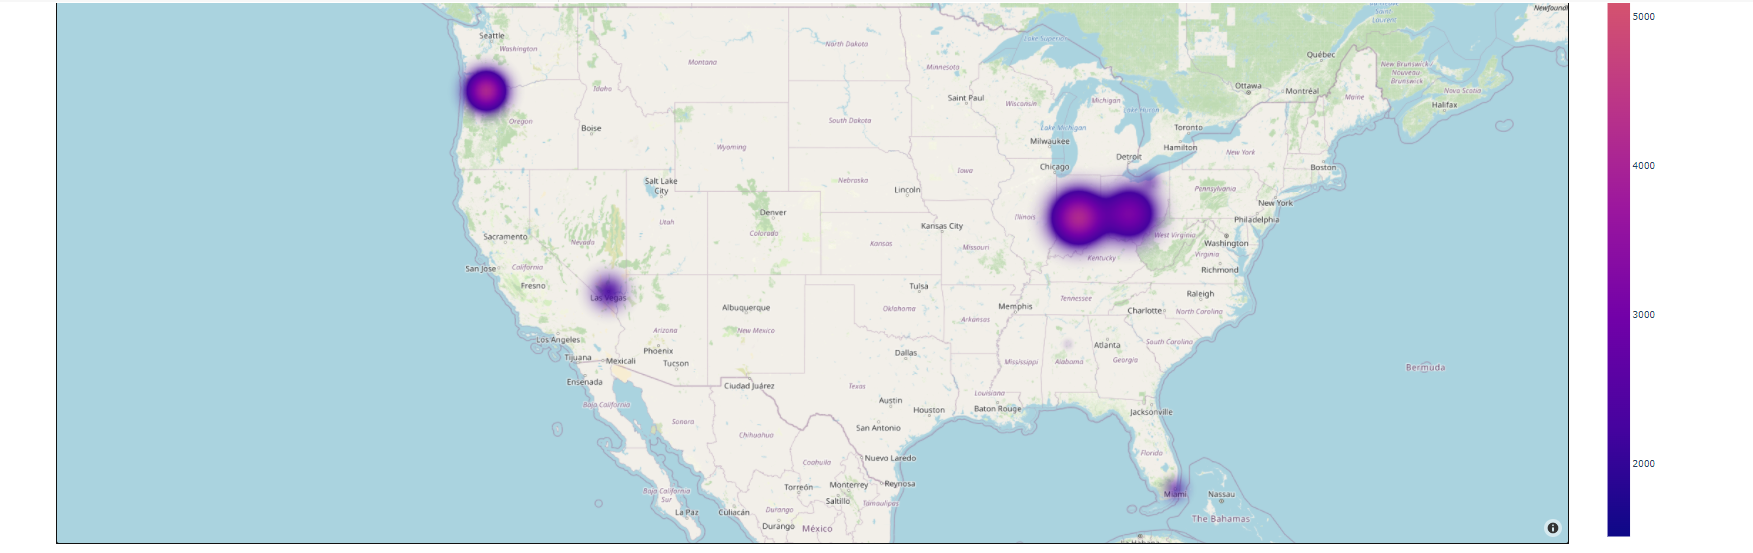

In [17]:
df_Portland = df.query('city in "Portland" & province in "OR"')\
          .groupby('postalCode', as_index=False)['address'].agg('count')\
          .sort_values('address', ascending=False)\
          .reset_index(drop=True)

portland_postal_code_df = df_Portland.groupby('postalCode', as_index=False)['address'].agg('sum')\
                                            .sort_values('address', ascending=False)\
                                            .reset_index(drop=True)

portland_postal_code_df['longitude'] = [-122.795568, -122.557409, -122.644123, -122.643912, -122.643912, -122.645115, -122.614626, -122.798574, -122.811306, -122.618610, -122.555333, -122.558336, -122.641624, -122.681501, -122.698767, -122.692988, -122.496404, -122.741338, -122.674155, -122.779164, -122.501725, -122.695013, -122.600566, -122.735141, -122.695013, -122.643912, -122.600304, -122.502278, -122.692654, -122.645115, -122.600806]
portland_postal_code_df['latitude'] = [45.446863, 45.481702, 45.513936, 45.529642, 45.480312, 45.401784, 45.405302, 45.554376, 45.442184, 45.551910, 45.513420, 45.507416, 45.577318, 45.533458, 45.515476, 45.589592, 45.513755, 45.611119, 45.518154, 45.500519, 45.562444, 45.451024, 45.479927, 45.551536, 45.451024, 45.529642, 45.580879, 45.482627, 45.487980, 45.480312, 45.537794]
portland_postal_code_df.rename(columns={'address':'restaurants'}, inplace=True)
portland_postal_code_df['restaurants'] = portland_postal_code_df['restaurants'].astype('float')
portland_postal_code_df = portland_postal_code_df.sort_values('restaurants', ascending=False)
list_restaurants = list(portland_postal_code_df['restaurants'])
list_rest_1 = []
for i in list_restaurants:
  x = i * 15
  list_rest_1.append(x)

fig2 = px.density_mapbox(
                        portland_postal_code_df, lat='latitude', lon='longitude', z='restaurants',
                        mapbox_style="open-street-map",
                        hover_name = 'postalCode',
                        height = 1500,
                        radius = list_rest_1
                        )
 
fig2.show()
portland_postal_code_df.head()                                         


postalCode  restaurants   longitude   latitude
0      97223         12.0 -122.795568  45.446863
1      97266          8.0 -122.557409  45.481702
2      97214          6.0 -122.644123  45.513936
3      97232          6.0 -122.643912  45.529642
4      97202          6.0 -122.643912  45.480312

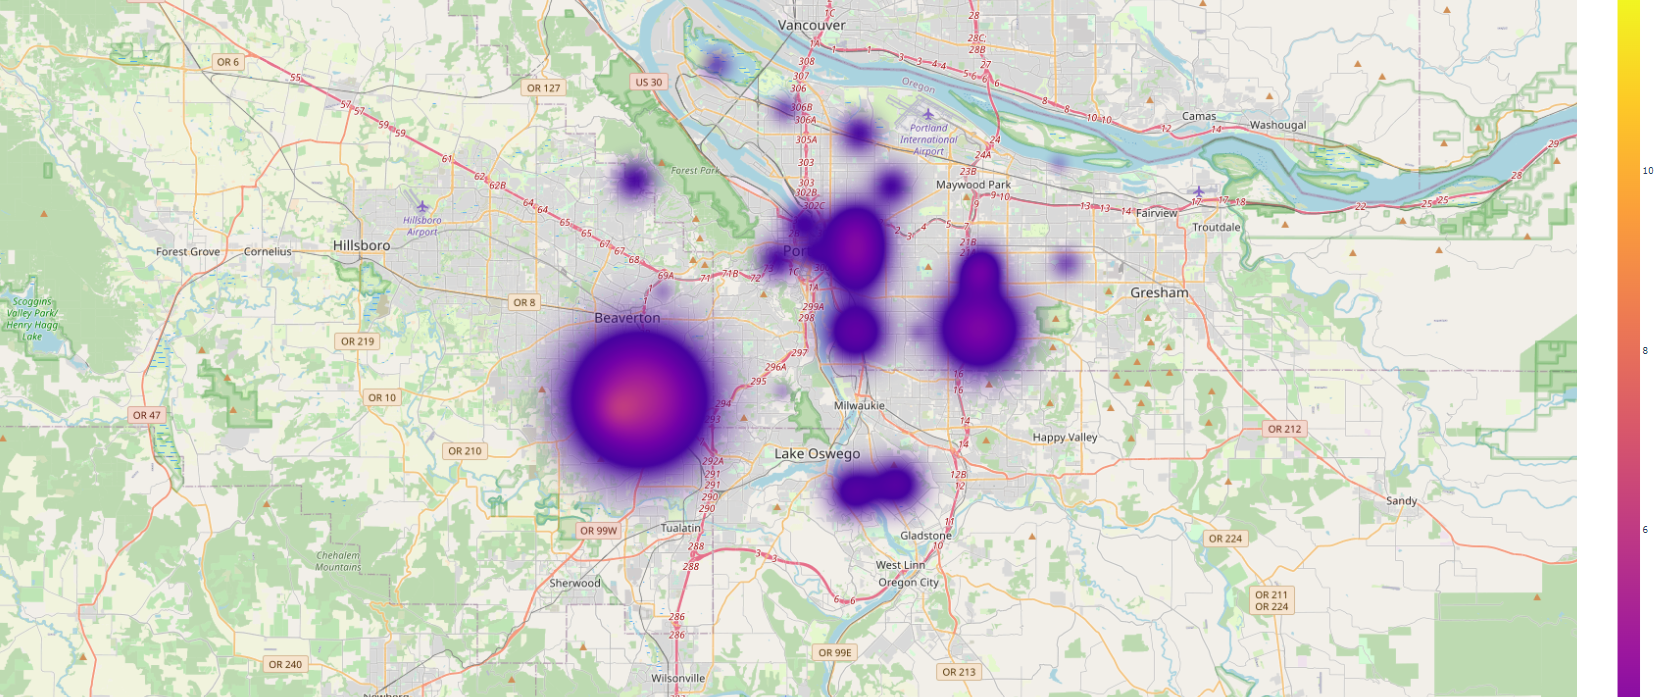

In [18]:
import folium

m = folium.Map(location=[45.5152, -122.6784], tiles="OpenStreetMap", zoom_start=12)

for i in range(0,len(portland_postal_code_df)):
   folium.Circle(
      location=[portland_postal_code_df.iloc[i]['latitude'], portland_postal_code_df.iloc[i]['longitude']],
      popup=portland_postal_code_df.iloc[i]['postalCode'],
      radius=float(portland_postal_code_df.iloc[i]['restaurants'])*400,
      color='crimson',
      fill=True,
      fill_color='blue'
   ).add_to(m)

folium.CircleMarker( # add one more circle
    [45.499921, -122.679069], popup="<b>Homestead</b>",
    color="black",
    fill=True,
    fill_color="#3186cc",
    radius=38
).add_to(m)

folium.map.Marker( # add text for first additional circle
    [45.490032, -122.721606],
    icon=DivIcon(
        icon_size=(180,15),
        icon_anchor=(0,0),
        html='<div style="font-size: 25pt; \
        color: white; \
        background: black"<b>Homestead</b>',
        )
    ).add_to(m)

folium.CircleMarker( # add one more circle
    [45.532763, -122.714266], popup="<b>Forest Park</b>",
    color="black",
    fill=True,
    fill_color="#3186cc",
    radius = 33
).add_to(m)

folium.map.Marker( # add text for second additional circle
    [45.540439, -122.767362],
    icon=DivIcon(
        icon_size=(110,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 25pt; \
        color: white; \
        background: black "<b>Forest Park</b>',
        )
    ).add_to(m)


m

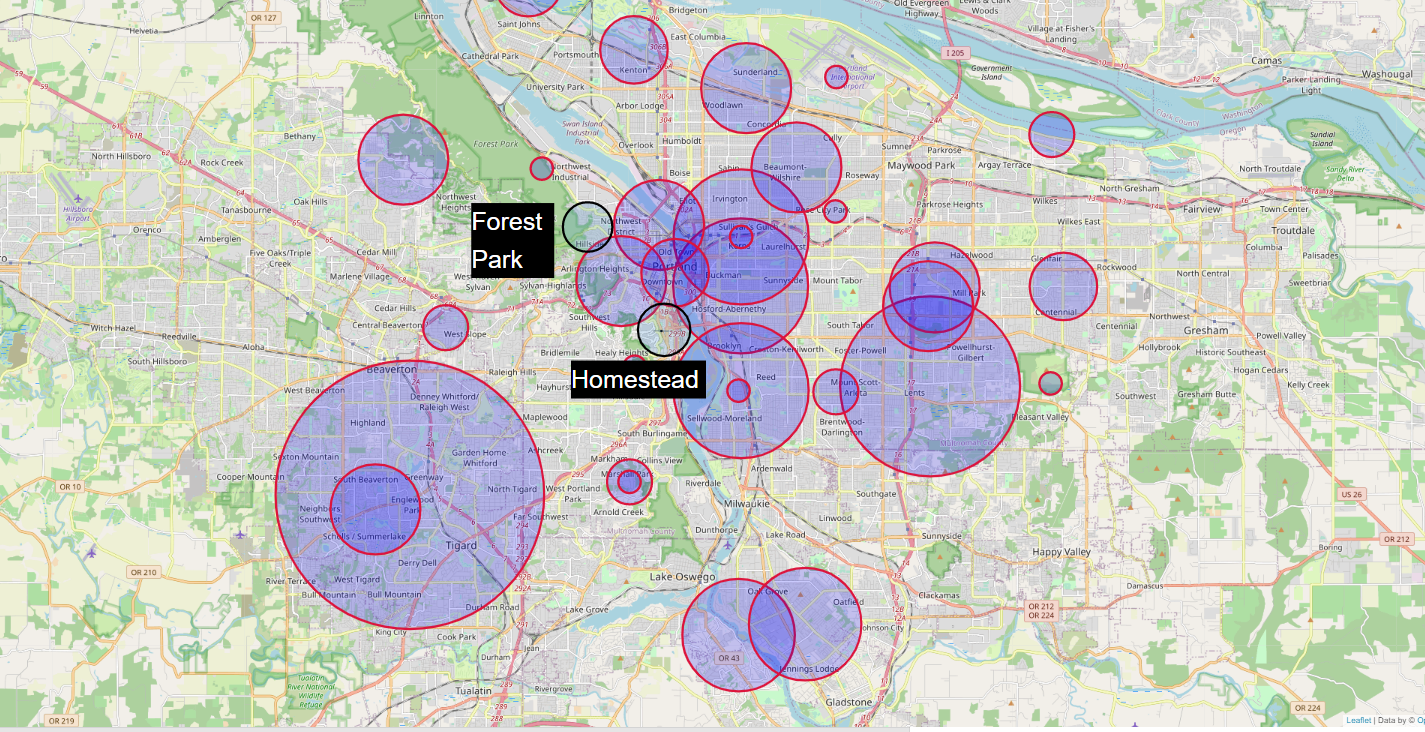